# Context
Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.

In [1]:

import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [4]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = r"C:\Users\karan\Desktop\prodigy_internship\datasets\archive\leapGestRecog\leapGestRecog"


In [5]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [6]:
# shuffle the input data
import random
random.shuffle(image_data)

In [7]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [8]:
label[:10]

[7, 4, 6, 0, 9, 5, 3, 1, 7, 8]

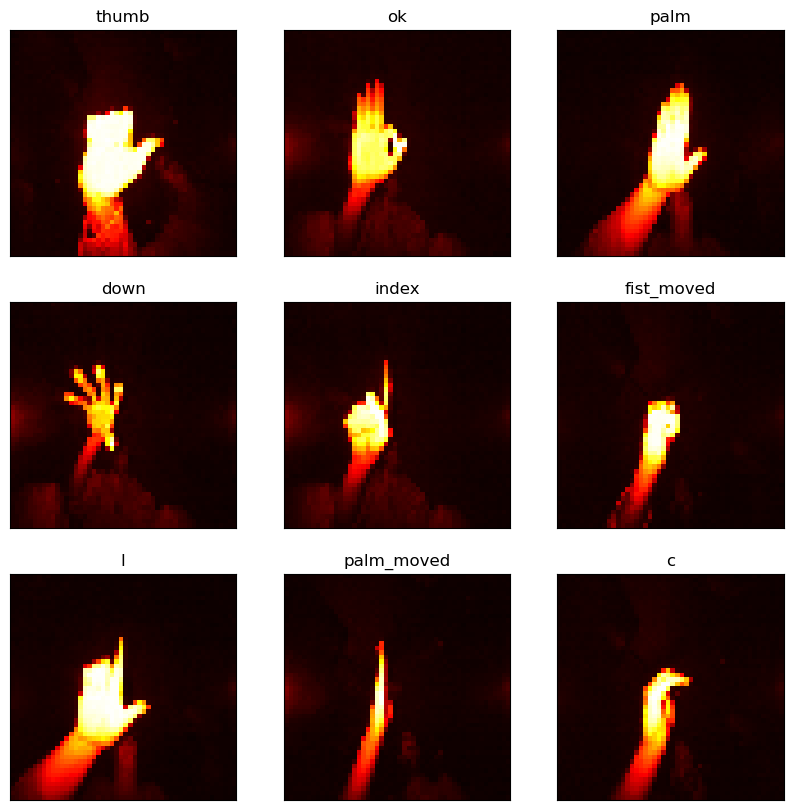

In [9]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [10]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

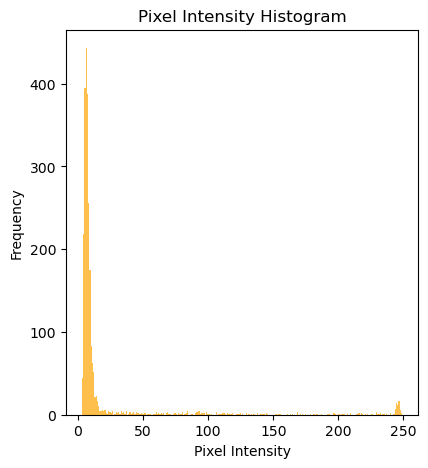

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Histogram of pixel intensity values for the first image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.hist(image_data[0][0].ravel(), bins=256, color='orange', alpha=0.7)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()


In [11]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

In [12]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

#  The model

In [14]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7


438/438 [==============================] - 43s 94ms/step - loss: 0.3627 - accuracy: 0.8798 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 2/7
438/438 [==============================] - 40s 91ms/step - loss: 0.0227 - accuracy: 0.9936 - val_loss: 0.0093 - val_accuracy: 0.9975
Epoch 3/7
438/438 [==============================] - 41s 93ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0042 - val_accuracy: 0.9985
Epoch 4/7
438/438 [==============================] - 40s 92ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0073 - val_accuracy: 0.9987
Epoch 5/7
438/438 [==============================] - 40s 92ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0077 - val_accuracy: 0.9988
Epoch 6/7
438/438 [==============================] - 41s 93ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0294 - val_accuracy: 0.9935
Epoch 7/7
438/438 [==============================] - 42s 95ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0033 - val_accuracy: 0.99

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

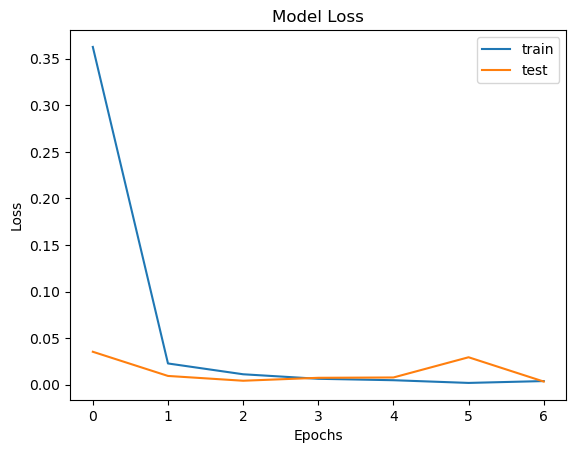

In [17]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

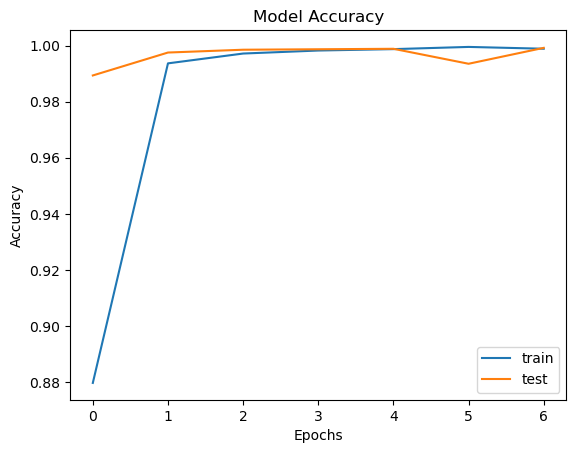

In [18]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [19]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 4s 20ms/step - loss: 0.0033 - accuracy: 0.9992
Test accuracy: 99.92%


188/188 [==============================] - 3s 18ms/step


[]

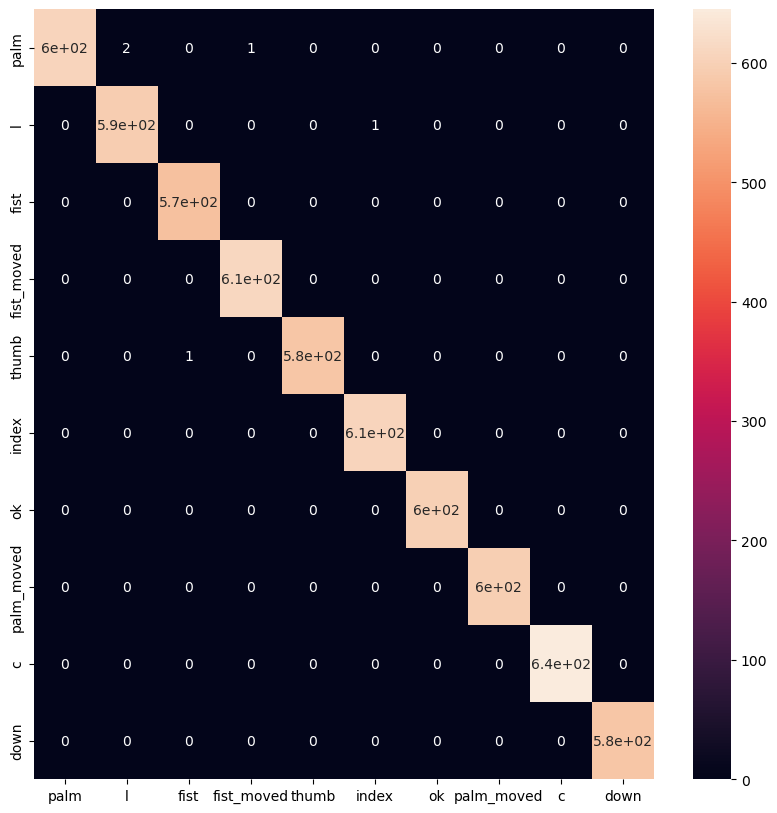

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()